# Reading a Dataset

In [14]:
# Perform imports and load the dataset:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('Data.csv')
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


# Data Pre-Processing

In [15]:
#check for null values
df.isnull().sum()

Text      3
Target    0
dtype: int64

In [16]:
# drop nan values
df=df.dropna()

In [17]:
df.isnull().sum()

Text      0
Target    0
dtype: int64

In [18]:
#Total classes
df['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [161]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

X = df['Text']  # this time we want to look at the text
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Build a Pipeline of Tfidfvectorizer and LinearSVC classifier model

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2),stop_words={'english'})),
                     ('clf', LinearSVC(penalty='l2')),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words={'english'})),
                ('clf', LinearSVC())])

In [163]:
# Form a prediction train set
predict_train = text_clf.predict(X_train)

<AxesSubplot:>

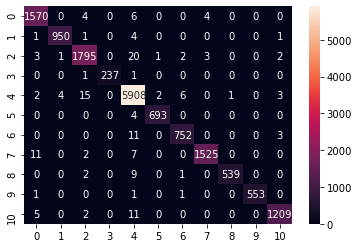

In [164]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [165]:
# Classification Report for train set
from sklearn.metrics import classification_report
print(classification_report(y_train, predict_train))

                  precision    recall  f1-score   support

         Bigdata       0.99      0.99      0.99      1584
      Blockchain       0.99      0.99      0.99       957
  Cyber Security       0.99      0.98      0.98      1827
   Data Security       1.00      0.99      1.00       239
         FinTech       0.99      0.99      0.99      5941
   Microservices       1.00      0.99      0.99       697
        Neobanks       0.99      0.98      0.98       766
        Reg Tech       1.00      0.99      0.99      1545
   Robo Advising       1.00      0.98      0.99       551
   Stock Trading       1.00      0.99      1.00       556
credit reporting       0.99      0.99      0.99      1227

        accuracy                           0.99     15890
       macro avg       0.99      0.99      0.99     15890
    weighted avg       0.99      0.99      0.99     15890



In [166]:
# Form a prediction set
predictions = text_clf.predict(X_test)

<AxesSubplot:>

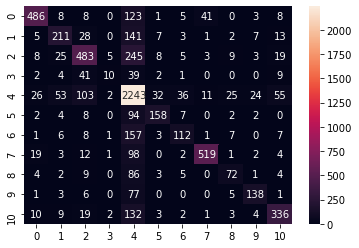

In [167]:
# Classification Report for test set
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                  precision    recall  f1-score   support

         Bigdata       0.86      0.71      0.78       683
      Blockchain       0.64      0.50      0.57       418
  Cyber Security       0.67      0.59      0.63       813
   Data Security       0.48      0.09      0.16       108
         FinTech       0.65      0.86      0.74      2610
   Microservices       0.73      0.57      0.64       277
        Neobanks       0.63      0.37      0.47       303
        Reg Tech       0.90      0.79      0.84       661
   Robo Advising       0.57      0.39      0.46       186
   Stock Trading       0.75      0.60      0.67       231
credit reporting       0.74      0.64      0.69       521

        accuracy                           0.70      6811
       macro avg       0.69      0.56      0.60      6811
    weighted avg       0.71      0.70      0.69      6811



### Train_Accuracy is 99 %
### Test_Accuracy is 70 %